In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
import matplotlib.pyplot as plt
from dataCleaning import bas_filter
%matplotlib inline

In [5]:
bas1, key1 = bas_filter.import_and_filter('../..', 'Plt1 m', '../../Plt1 Points List.xlsx')
bas2, key2 = bas_filter.import_and_filter('../..', 'Plt2 m', '../../Plt2 Points List.xlsx')
#bas3, key3 = bas_filter.import_and_filter('../..', 'Plt3 m',  '../../Plt3 Points List.xlsx')

['../..\\Plt1 m 2016-11.csv', '../..\\Plt1 m 2016-12.csv', '../..\\Plt1 m 2017-01.csv', '../..\\Plt1 m 2017-02.csv', '../..\\Plt1 m 2017-03.csv', '../..\\Plt1 m 2017-04.csv', '../..\\Plt1 m 2017-05.csv', '../..\\Plt1 m 2017-06.csv', '../..\\Plt1 m 2017-07.csv', '../..\\Plt1 m 2017-08.csv', '../..\\Plt1 m 2017-09.csv', '../..\\Plt1 m 2017-10.csv', '../..\\Plt1 m 2017-12.csv', '../..\\Plt1 m 2018-01.csv', '../..\\Plt1 m 2018-02.csv', '../..\\Plt1 m 2018-03.csv', '../..\\Plt1 m 2018-04.csv']
CommunicationFailure_COV
Original data contains 143240 points and 414 dimensions.
Filtered data contains 136242 points and 66 dimensions.
['../..\\Plt2 m 2017-07.csv', '../..\\Plt2 m 2017-08.csv', '../..\\Plt2 m 2017-09.csv', '../..\\Plt2 m 2017-10.csv', '../..\\Plt2 m 2017-11.csv', '../..\\Plt2 m 2017-12.csv', '../..\\Plt2 m 2018-01.csv', '../..\\Plt2 m 2018-02.csv', '../..\\Plt2 m 2018-03.csv', '../..\\Plt2 m 2018-04.csv']
CHWPSPD2
Original data contains 86497 points and 412 dimensions.
Filtered dat

In [26]:
bas1.columns

Index(['CDWVLV', 'CDWVLV2', 'CHkW', 'CHWDP2', 'CHWFLO', 'CHWRT', 'CHWRT2',
       'CHWRT3', 'CHWST', 'CHWST2', 'CHWST3', 'CLGMODE',
       'CommunicationFailure', 'CTTR_ALARM', 'HX1CDWRT', 'HX1CDWST',
       'HX1CDWVLV', 'HX1CHWRT', 'HX1CHWST', 'HX1CHWVLV', 'LOOPREQ',
       'MaxCHDPLift', 'MaxCHDTLift', 'MinCHDPLift', 'MinCHDTLift', 'OAH',
       'OAT', 'OAWB', 'PCHWP3Failed', 'PCHWP3HZ', 'PCHWP3kW', 'PCHWP3S',
       'PCHWP3SPD', 'PCHWP3SS', 'PCHWP4Failed', 'PCHWP4HZ', 'PCHWP4kW',
       'PCHWP4S', 'PCHWP4SPD', 'PCHWP4SS', 'PCHWP5Failed', 'PCHWP5HZ',
       'PCHWP5kW', 'PCHWP5S', 'PCHWP5SPD', 'PCHWP5SS', 'SCHWP3Failed',
       'SCHWP3HZ', 'SCHWP3kW', 'SCHWP3S', 'SCHWP3SPD', 'SCHWP3SS',
       'SCHWP4Failed', 'SCHWP4HZ', 'SCHWP4kW', 'SCHWP4S', 'SCHWP4SPD',
       'SCHWP4SS', 'SCHWP5Failed', 'SCHWP5HZ', 'SCHWP5kW', 'SCHWP5S',
       'SCHWP5SPD', 'SCHWP5SS', 'OptimumControl', 'kW/Ton'],
      dtype='object')

In [27]:
bas2.columns

Index(['BASMODE', 'BASWATCHDOG', 'BTUMETERTONS', 'CDWBPV', 'CDWBVLV_Alarm',
       'CDWDP', 'CDWFLO', 'CDWPTR_ALARM', 'CDWRP', 'CDWRT', 'CDWSP', 'CDWST',
       'CHWBPV', 'CHWDP2', 'CHWDP3', 'CHWDP4', 'CHWDP5', 'CHWDP6', 'CHWFLO',
       'CHWFLO2', 'CHWFLO3', 'CHWRP', 'CHWRT', 'CHWRT2', 'CHWRT3', 'CHWSP',
       'CHWST', 'CHWST2', 'CLGREQD', 'COMLOSSBAS', 'CTTR_ALARM', 'LOOPREQ',
       'OAH', 'OAT', 'OAWB', 'PCHWPTR_Alarm', 'RUNCTFAN_Alarm',
       'OptimumControl', 'kW/Ton'],
      dtype='object')

In [28]:
n = len(bas1.columns)

In [29]:
m = len(bas2.columns)

In [37]:
x1train, x1test, y1train, y1test = train_test_split(bas1.values[:, 0:(n-2)], bas1.values[:,(n-1)], test_size = 0.25, random_state = 42)

In [38]:
x2train, x2test, y2train, y2test = train_test_split(bas2.values[:, 0:(m-2)], bas2.values[:,(m-1)], test_size = 0.25, random_state = 42)

#### LASSO

In [40]:
reg_lasso = linear_model.Lasso()
reg_lasso.fit(x1train, y1train)
coef = reg_lasso.coef_
lasso_coef = pd.DataFrame(coef, bas1.columns[:-2])
lasso_coef = lasso_coef[coef!=0]
lasso_coef.columns = ['lasso_coef']
print (lasso_coef)
lc = lasso_coef.values.tolist()

      lasso_coef
CHkW    0.002053


In [42]:
reg_lasso = linear_model.Lasso()
reg_lasso.fit(x2train, y2train)
coef = reg_lasso.coef_
lasso_coef = pd.DataFrame(coef, bas2.columns[:-2])
lasso_coef = lasso_coef[coef!=0]
lasso_coef.columns = ['lasso_coef']
print (lasso_coef)
lc = lasso_coef.values.tolist()

              lasso_coef
BTUMETERTONS   -0.000160
CDWFLO          0.000008
CHWFLO          0.000064
CHWFLO2         0.000120


0.8516390088699353
0.0025371429969497377


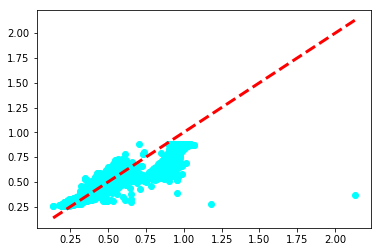

In [46]:
y1las = cross_val_predict(reg_lasso, x1test, y1test)
plt.scatter(y1test, y1las, color = 'cyan')
plt.plot([y1test.min(), y1test.max()], [y1test.min(), y1test.max()], 'k--', lw=3, color = 'red')
print (metrics.r2_score(y1test, y1las))
print (metrics.mean_squared_error(y1test, y1las))

0.1203725966935465
0.06783450204183418


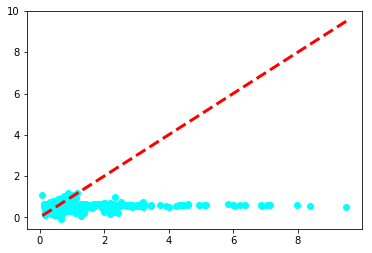

In [47]:
y2las = cross_val_predict(reg_lasso, x2test, y2test)
plt.scatter(y2test, y2las, color = 'cyan')
plt.plot([y2test.min(), y2test.max()], [y2test.min(), y2test.max()], 'k--', lw=3, color = 'red')
print (metrics.r2_score(y2test, y2las))
print (metrics.mean_squared_error(y2test, y2las))

#### LINEAR REGRESSION

In [51]:
reg1_linear = linear_model.LinearRegression()
reg1_linear.fit(x1train, y1train)
coef = reg1_linear.coef_
linear_coef1 = pd.DataFrame(coef, bas1.columns[:-2])
linear_coef1 = linear_coef1[abs(coef) > 1e-02]
linear_coef1.columns = ['linear_coef']
linear_coef1

,linear_coef
CDWVLV2,1.596151e+09
CHWRT,-1.348031e-02
CHWST,1.663003e-02
CLGMODE,6.687193e+07
CommunicationFailure,5.712598e+07
CTTR_ALARM,4.054382e+07
HX1CDWVLV,4.757083e+07
HX1CHWVLV,-5.681738e+05
LOOPREQ,-2.861640e+05
MaxCHDTLift,1.343562e-02


In [52]:
reg2_linear = linear_model.LinearRegression()
reg2_linear.fit(x2train, y2train)
coef = reg2_linear.coef_
linear_coef2 = pd.DataFrame(coef, bas2.columns[:-2])
linear_coef2 = linear_coef2[abs(coef) > 1e-02]
linear_coef2.columns = ['linear_coef']
linear_coef2

,linear_coef
BASMODE,-0.231612
CDWRP,-0.039241
CDWRT,0.015032
CDWSP,0.011161
CHWRT,-0.067699
CHWRT2,0.071684
CHWRT3,-0.015393
CHWST,-0.015118


In [53]:
linear_coef1.describe()

,linear_coef
count,3.000000e+01
mean,6.019513e+07
std,2.906971e+08
min,-1.680489e+06
25%,-7.891312e-02
50%,-1.292566e-02
75%,1.926335e-01
max,1.596151e+09


In [54]:
linear_coef2.describe()

,linear_coef
count,8.000000
mean,-0.033898
std,0.089864
min,-0.231612
25%,-0.046355
50%,-0.015255
75%,0.012129
max,0.071684


0.9564920101104729
0.0007440364951646943


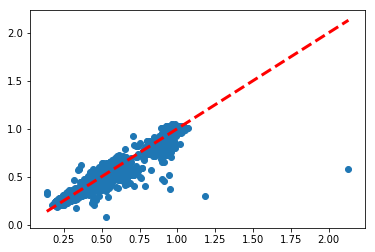

In [58]:
ylin1 = cross_val_predict(reg1_linear, x1test, y1test, cv = 10)
plt.scatter(y1test, ylin1)
plt.plot([y1test.min(), y1test.max()], [y1test.min(), y1test.max()], 'k--', lw=3, color = 'red')
print (metrics.r2_score(y1test, ylin1))
print (metrics.mean_squared_error(y1test, ylin1))

0.21851886525977682
0.06026572550027971


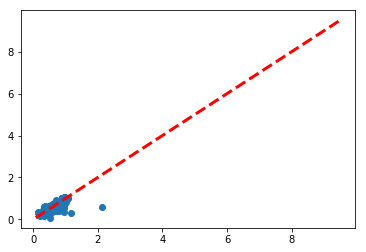

In [59]:
ylin2 = cross_val_predict(reg2_linear, x2test, y2test, cv = 10)
plt.scatter(y1test, ylin1)
plt.plot([y2test.min(), y2test.max()], [y2test.min(), y2test.max()], 'k--', lw=3, color = 'red')
print (metrics.r2_score(y2test, ylin2))
print (metrics.mean_squared_error(y2test, ylin2))